<b> <font face='verdana' size='6' color='navy'>Principles of Machine Learning (CAI1C01)</font>
<b> <p align='justify'> <font size='5'> Semester & Term:	 April 2019/2020, Term 1 </p>
<b> <p align='justify'> <font size='5'> Project:	 Prediction of Telco Customer Churn with Logistic Regression Model </p>
### __Name__:	 Wong Win-Lin Anne  __&emsp;Admin Number__:	 1981190J       __&emsp;Tutorial Group__:	 P01</p>

<b> <font face='verdana' size='5' color='navy'>1. INTRODUCTION</font>
    <b> <p align='justify'> <font size='4'> *Losing customers affect revenues and brand image. Acquiring new customers is difficult and costly compared to retaining an existing customer. This makes predicting which customer will churn especially important in the competitive Telco business. In order to reach-out to retain target customers, a Telco needs to be able to predict which of its customers are likely to churn. The aim of this project is to analyze the Telco's customer data with churn information to create a machine learning model which can predict if a customer is likely to churn.*</p> <br>

<b> <font face='verdana' size='5' color='navy'>2. DATA EXPLORATION, DATE PREPARATION & FEATURE SELECTION</font>
## __2.1 Import Modules__

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## __2.2 Load and Explore Data__

#### __Load the dataset__

In [119]:
df = pd.read_csv('data//TelcoCustomerChurn.csv')

#### __Verify number of records and attributes__

In [62]:
df.shape

(7043, 21)

#### __Examine the attributes__

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

#### __Examine the first few records__

In [64]:
df.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### __Review the descriptive statistics for numerical attributes__

In [65]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#### __Check for duplicate customer records__

In [66]:
df.CustomerID.duplicated().sum()

0

#### __Review the distribution of churn__

In [67]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

## __2.3 Data Visualization__

### __Bar Plots__

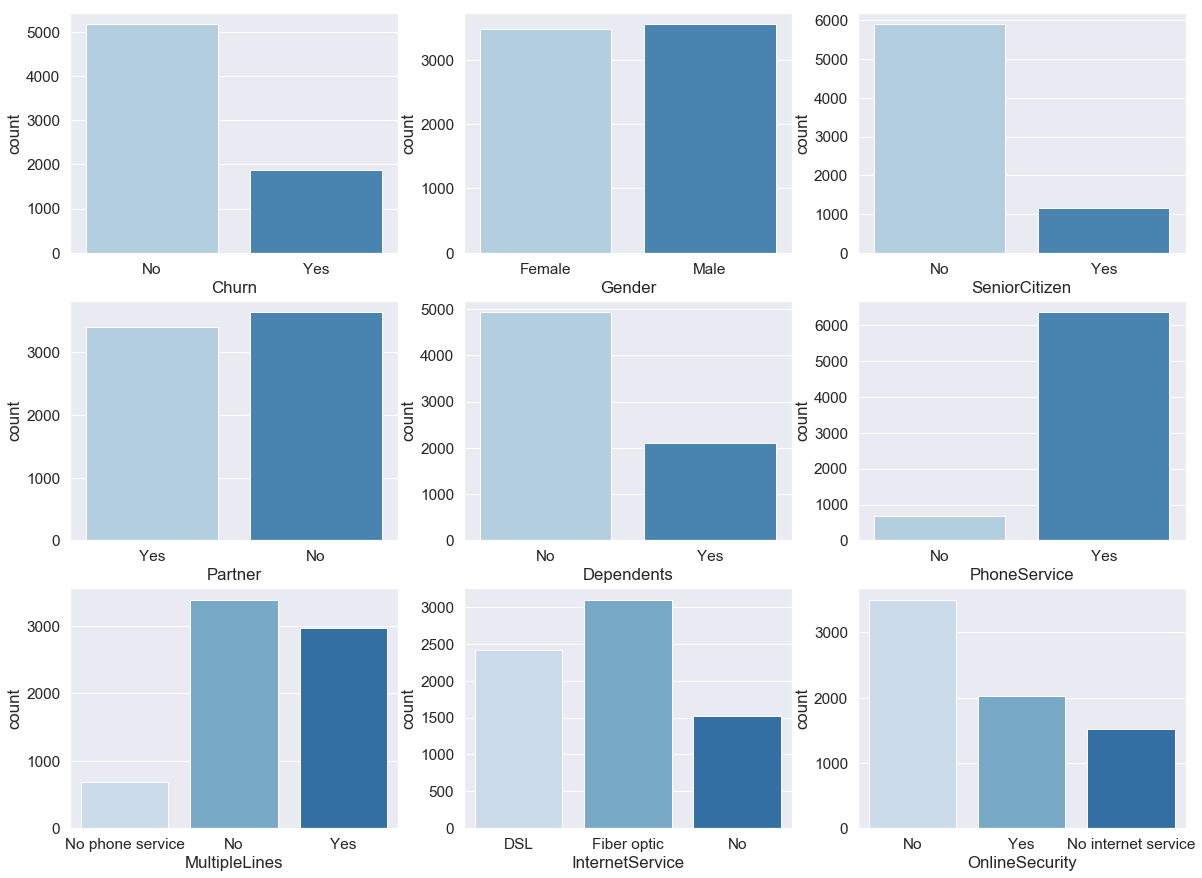

In [69]:
fig ,ax = plt.subplots(3,3,figsize=(20,15))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(data=df, ax=ax1, x='Churn', palette='Blues')
sns.countplot(data=df, ax=ax2, x='Gender', palette='Blues')
sns.countplot(data=df, ax=ax3, x='SeniorCitizen', palette='Blues')
sns.countplot(data=df, ax=ax4, x='Partner', palette='Blues')
sns.countplot(data=df, ax=ax5, x='Dependents', palette='Blues')
sns.countplot(data=df, ax=ax6, x='PhoneService', palette='Blues')
sns.countplot(data=df, ax=ax7, x='MultipleLines', palette='Blues')
sns.countplot(data=df, ax=ax8, x='InternetService', palette='Blues')
sns.countplot(data=df, ax=ax9, x='OnlineSecurity', palette='Blues')

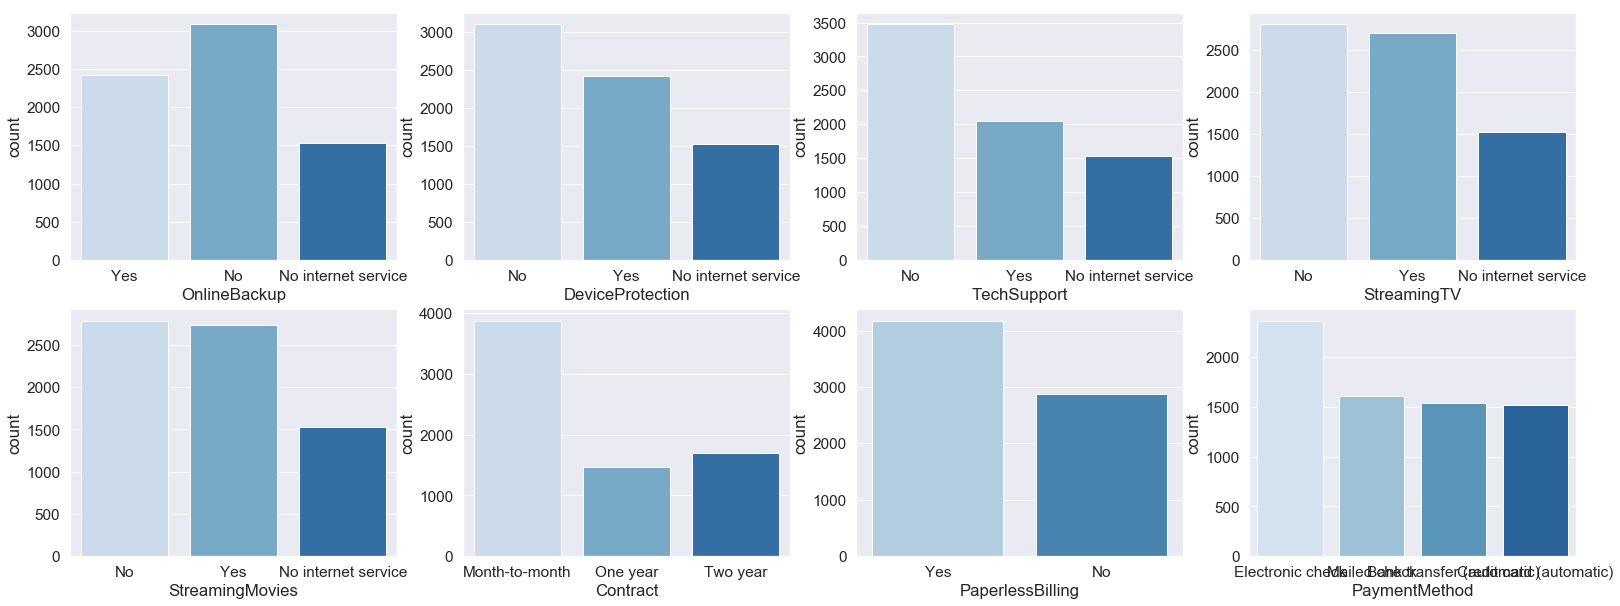

In [75]:
fig ,ax = plt.subplots(2,4,figsize=(27,10))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = ax.flatten()
sns.countplot(data=df, ax=ax1, x='OnlineBackup', palette='Blues')
sns.countplot(data=df, ax=ax2, x='DeviceProtection', palette='Blues')
sns.countplot(data=df, ax=ax3, x='TechSupport', palette='Blues')
sns.countplot(data=df, ax=ax4, x='StreamingTV', palette='Blues')
sns.countplot(data=df, ax=ax5, x='StreamingMovies', palette='Blues')
sns.countplot(data=df, ax=ax6, x='Contract', palette='Blues')
sns.countplot(data=df, ax=ax7, x='PaperlessBilling', palette='Blues')
sns.countplot(data=df, ax=ax8, x='PaymentMethod', palette='Blues')

### __Box and Whisker Plots__

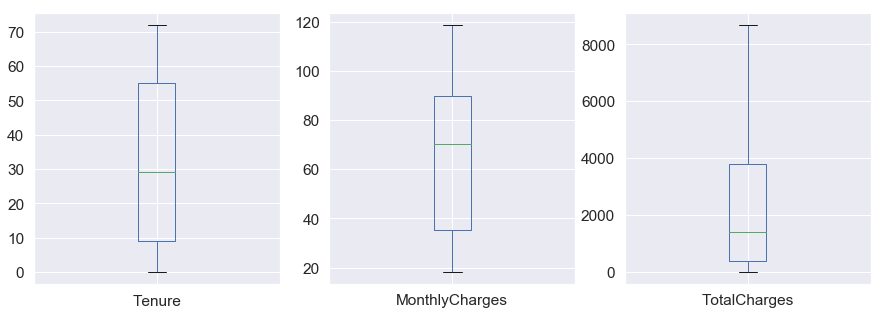

In [76]:
df.plot(kind='box', subplots=True, figsize=(15,5), layout=(1,3), sharex=False, sharey=False)
plt.show()

### __Histograms__

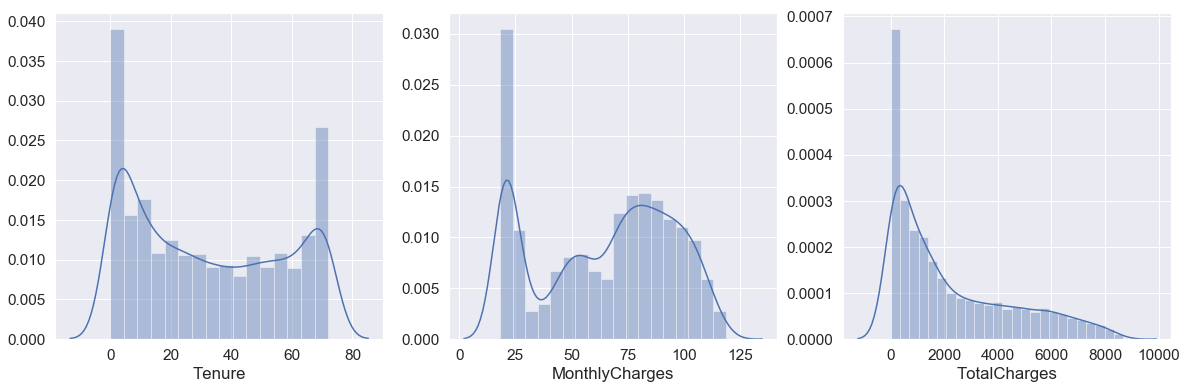

In [77]:
fig ,ax = plt.subplots(1,3,figsize=(20,6))
ax1,ax2,ax3 = ax.flatten()
sns.distplot(df.Tenure, ax=ax1)
sns.distplot(df.MonthlyCharges, ax=ax2)
sns.distplot(df.TotalCharges, ax=ax3)

## __2.4 Data Transformation__

### __Binary Encoding__

In [120]:
df['Male'] = df['Gender'].map({'Male':1, 'Female':0})
df['Senior'] = df['SeniorCitizen'].map({'Yes':1, 'No':0})
df['Spouse'] = df['Partner'].map({'Yes':1, 'No':0})
df['Depts'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PhoneSvc'] = df['PhoneService'].map({'Yes':1, 'No':0})
df['CustChurn'] = df['Churn'].map({'Yes':1, 'No':0})
df['PaperlessBill'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})

### __Features Removal__

In [121]:
del df['CustomerID']            # Removed based on domain knowledge
del df['Gender']
del df['SeniorCitizen']
del df['Partner']
del df['Dependents']
del df['PhoneService']
del df['PaperlessBilling']      
del df['Churn']

### __One Hot Encoding__

In [122]:
modified_df = pd.get_dummies(df, columns=['Contract','PaymentMethod','MultipleLines','InternetService','OnlineSecurity',
                            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [81]:
modified_df.tail(5)

,Tenure,MonthlyCharges,TotalCharges,Male,Senior,Spouse,Depts,PhoneSvc,CustChurn,PaperlessBill,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
7038,24,84.80,1990.50,1,0,1,1,1,0,1,...,1,0,0,1,0,0,1,0,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,1,1,0,0,0,0,1,0,0,1
7040,11,29.60,346.45,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,4,74.40,306.60,1,1,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
7042,66,105.65,6844.50,1,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1


## __2.5 Predictive Modelling__
<b> <p align='justify'> <font size='3'> Before building the predictive model, the numeric variables are scaled with MinMaxScaler since there are no outliers identified (this scaler preserves the shape of the original distribution so the information embedded in the original data will not be meaningfully changed). The dataset is partitioned into training set of 80% observations to train the model and then tested against the balance test observations at 20% for this binary classification problem. </p>

### __Base Model__
<b> <p align='justify'> <font size='3'> Using Logistic Regression, build a base model with the non-categorical variables (Tenure, MonthlyCharges and TotalCharges). </p>

In [123]:
from random import sample
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

X = modified_df[['Tenure','MonthlyCharges','TotalCharges']].values
y = modified_df['CustChurn'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC_AUC:")
print(roc_auc_score(y_test, y_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

ROC_AUC:
0.68278143522118

Confusion matrix:
[[939  82]
 [215 173]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1021
           1       0.68      0.45      0.54       388

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409



### __Full Features Model__
<b> <p align='justify'> <font size='3'> The full features model is built with all 40 variables which is a much more complex model and prone to overfitting. </p>

In [124]:
X = modified_df.drop(['CustChurn'], axis=1).values
y = modified_df['CustChurn'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC_AUC:")
print(roc_auc_score(y_test, y_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

ROC_AUC:
0.7295594070902793

Confusion matrix:
[[924  97]
 [173 215]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1021
           1       0.69      0.55      0.61       388

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## __2.6 Feature Selection with Correlation Analysis__
<b> <p align='justify'> <font size='3'> To reduce the dimensions and complexity of the model, one method is to select the most relevant features based on their correlation to the target variable, that is, select features which are most correlated (either positively or negatively) with the target variable 'CustChurn'. In addition, multicollinearity among features can adversely affect regression models, leading to skewed or misleading results. Moreover, for some instances, such correlated features being highly linearly dependent would almost have the same effect on the dependent variable, making them redundant. Thus, if there are two features which are highly correlated to each other, one of them can be dropped. </p>

### __Correlation Heatmap__

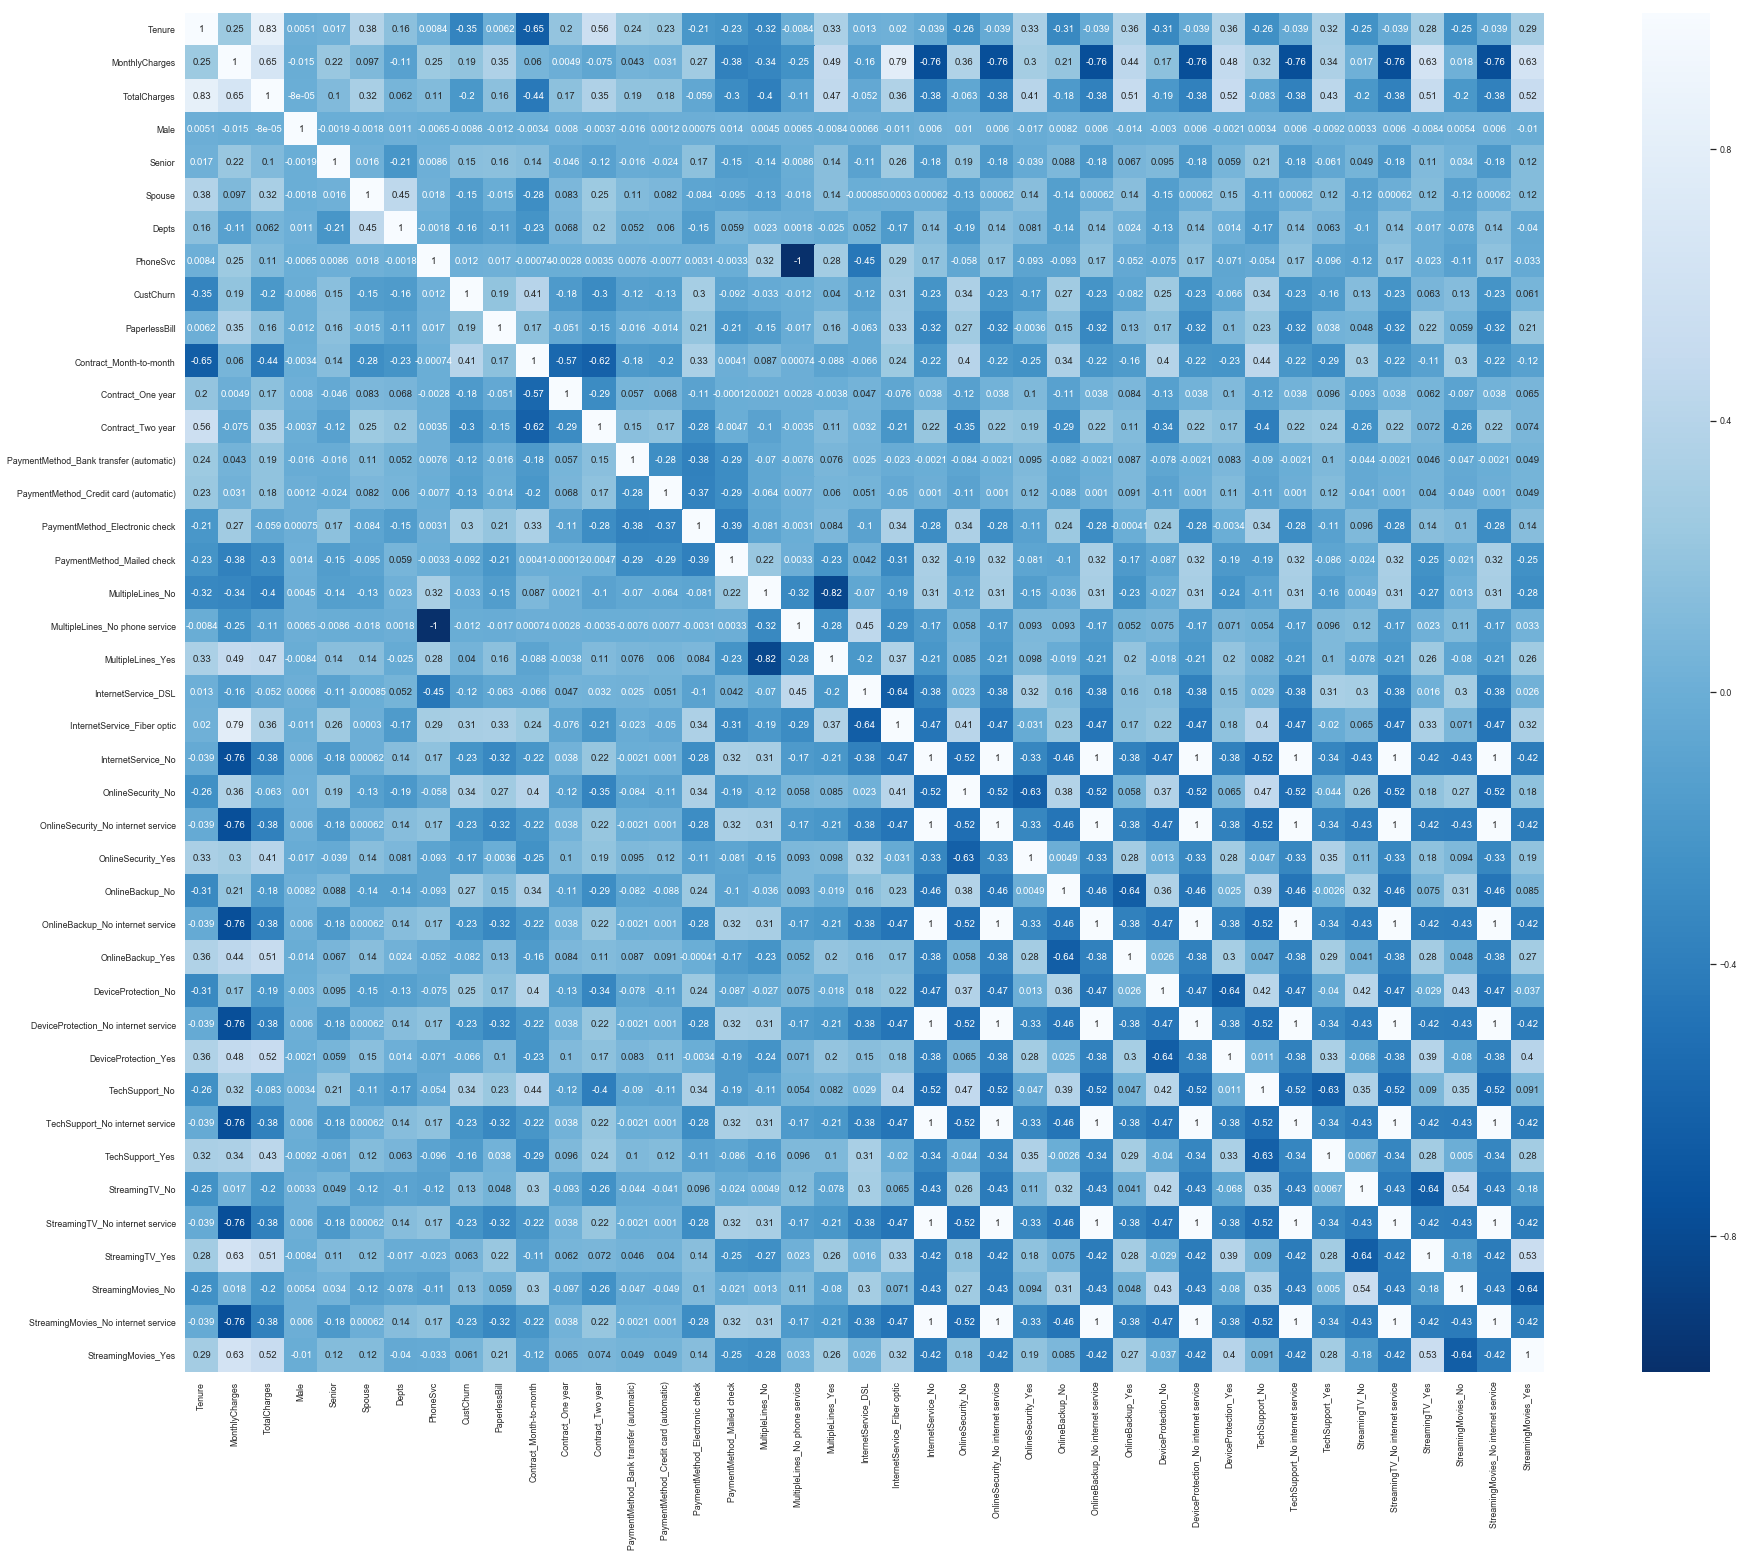

In [88]:
correlation = modified_df.corr()
plt.figure(figsize=(35, 25))
sns.set(font_scale=0.8)
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r')  

### __Correlation Coefficients (Features vs Target)__

In [125]:
cor_target = abs(correlation['CustChurn'])
relevant_features = cor_target[cor_target>0.25]
relevant_features.sort_values(ascending=False)

CustChurn                         1.000000
Contract_Month-to-month           0.405103
Tenure                            0.352229
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
Contract_Two year                 0.302253
PaymentMethod_Electronic check    0.301919
OnlineBackup_No                   0.268005
DeviceProtection_No               0.252481
Name: CustChurn, dtype: float64

### __Model with Selected Features__
<b> <p align='justify'> <font size='3'> The most relevant features are added to the model one by one from top down based on their correlation to the target variable until there is little significant improvement made to the performance metrics upon adding the next feature. </p>

In [126]:
from sklearn.linear_model import LogisticRegressionCV

X = modified_df[['Contract_Month-to-month','Tenure','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','Contract_Two year',
                 'PaymentMethod_Electronic check','OnlineBackup_No']].values                   # ,'DeviceProtection_No'
y = modified_df['CustChurn'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

clf = LogisticRegression(solver='liblinear')  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC_AUC:")
print(roc_auc_score(y_test, y_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

ROC_AUC:
0.7256934277088359

Confusion matrix:
[[924  97]
 [176 212]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1021
           1       0.69      0.55      0.61       388

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<b> <font face='verdana' size='5' color='navy'>3. METHODS & IMPROVEMENTS</font>

## __3.1 SMOTE (Synthetic Minority Oversampling Technique)__
<b> <p align='justify'> <font size='3'> Due to the imbalanced dataset, the precision and recall scores are quite low for positive churn. To improve the performance of the classifier, the SMOTE technique is applied to the training dataset to train the model by upsampling the minority class of positive churn. </p>

In [127]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({0: 4153, 1: 4153})


In [128]:
clf = LogisticRegression(solver='liblinear')   
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print("ROC_AUC:")
print(roc_auc_score(y_test, y_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

ROC_AUC:
0.760122479477367

Confusion matrix:
[[768 253]
 [ 90 298]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1021
           1       0.54      0.77      0.63       388

   micro avg       0.76      0.76      0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



## __3.2 Hyperparameter Tuning__
<b> <p align='justify'> <font size='3'> Using GridSearchCV, search for the best parameters for optimizing the AUC score and the Recall score. </p>

In [129]:
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(solver='liblinear')
penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparameters = dict(C=C, penalty=penalty)

In [130]:
clf = GridSearchCV(LR, hyperparameters, cv=10, verbose=0, scoring='roc_auc')
best_clf = clf.fit(X_scaled, y)

print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


<b> <font face='verdana' size='5' color='navy'>4. RESULTS & ANALYSIS</font>

## __4.1 Final Model__
### __Performance Metrics__
<b> <p align='justify'> <font size='3'> Hyperparameter tuning did not improve the performance afterall. </p>

In [132]:
clf = LogisticRegression(solver='liblinear', penalty='l2', C=1)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print("ROC_AUC:")
print(roc_auc_score(y_test, y_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

ROC_AUC:
0.760122479477367

Confusion matrix:
[[768 253]
 [ 90 298]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1021
           1       0.54      0.77      0.63       388

   micro avg       0.76      0.76      0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



### __Logistic Regression Model__

In [133]:
print('Intercept:' + str(clf.intercept_))
print('Coefficients:' + str(clf.coef_))

Intercept:[-1.08548821]
Coefficients:[[ 0.71575809 -1.88400262  0.58661676  0.40169757  1.09624271 -0.72097596
   0.38266138  0.0491488 ]]


### __Confusion Matrix Heatmap__

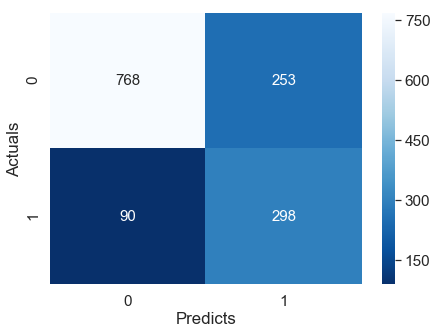

In [134]:
data = {'y_Pred': clf.predict(X_test), 'y_Act': y_test}
cm_df = pd.DataFrame(data, columns=['y_Act','y_Pred'])

confusion_matrix = pd.crosstab(cm_df['y_Act'], cm_df['y_Pred'], rownames=['Actuals'], colnames=['Predicts'])

plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size':15}, fmt='.0f', cmap='Blues_r')

<b> <p align='justify'> <font size='3'> The following codes compare the model's class predictions with the associated probability values for the first 10 observations against the test set's actual labels. </p>

In [135]:
print('Actuals:', y_test[0:10])
print('Predicts:', clf.predict(X_test)[0:10])

Actuals: [1 1 1 0 0 1 1 0 0 0]
Predicts: [0 1 1 0 0 0 1 1 0 1]


In [136]:
clf.predict_proba(X_test)[0:10, :]

array([[0.70614552, 0.29385448],
       [0.22709459, 0.77290541],
       [0.17821686, 0.82178314],
       [0.52088912, 0.47911088],
       [0.51744793, 0.48255207],
       [0.65071877, 0.34928123],
       [0.29915483, 0.70084517],
       [0.11454287, 0.88545713],
       [0.64085195, 0.35914805],
       [0.30189253, 0.69810747]])

## __4.2 Classification Threshold__
<b> <p align='justify'> <font size='3'> While the model can predict the class values directly, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose or calibrate the threshold for how to interpret the predicted probabilities. So far, it is assumed that a threshold of 0.5 and above predicted probability results in a positive label for class prediction. However, this can be adjusted to accomodate business objectives. </p>

In [138]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

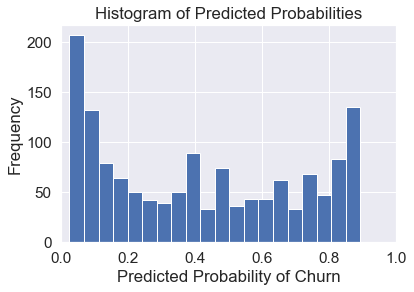

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 11

plt.hist(y_pred_prob, bins=20)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')

### __ROC Curve and AUC__
<b> <p align='justify'> <font size='3'> ROC curve can help to choose a threshold which balances sensitivity and specificity. It should be used when there are roughly equal number of observations for each class. </p>

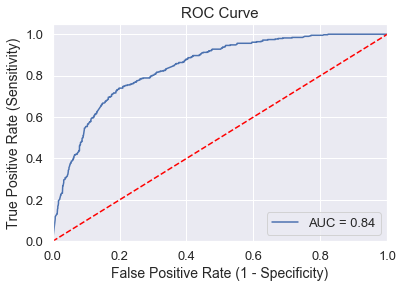

In [140]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=13)
plt.grid(True)

<b> <p align='justify'> <font size='3'> This threshold can be adjusted to increase sensitivity by decreasing threshold or increase specificity by increasing threshold. There is a trade-off between sensitivity and specificity when the threshold is adjusted. </p>

In [141]:
def evaluate_threshold(threshold):
    print ("Sensitivity:", tpr[thresholds > threshold][-1])
    print ("Specificity:", 1 - fpr[thresholds > threshold][-1])

In [142]:
evaluate_threshold(0.5)

Sensitivity: 0.7680412371134021
Specificity: 0.7551420176297747


In [143]:
evaluate_threshold(0.4)

Sensitivity: 0.8479381443298969
Specificity: 0.6366307541625857


### __Precision-Recall Curve__
<b> <p align='justify'> <font size='3'> The Precision-Recall curve summarizes the trade-off between the true positive rate and the positive predictive value using different probability thresholds. It should be used when there is moderate to large class imbalance. </p>

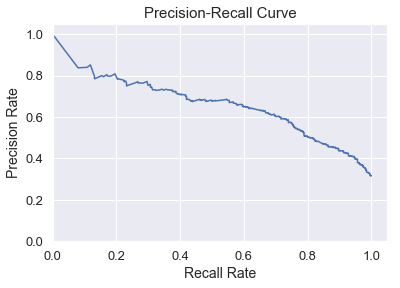

In [144]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve', fontsize=15)
plt.xlabel('Recall Rate', fontsize=14)
plt.ylabel('Precision Rate', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)

##### __Definitions:__
- Precision: Number of items correctly identified as positive out of total items identified as positives.
- Recall (aka. Sensitivity): Number of items correctly identified as positive out of total true positives.
- Specificity: Number of items correctly identified as negative out of total negatives. 

<b> <font face='verdana' size='5' color='navy'>5. CONCLUSION</font>
<b> <p align='justify'> <font size='3'> AUC (ie. Area under ROC Curve) represents the likelihood that the classifier will assign a higher predicted probability to the positive observation and a score of 76% is still quite good in this case. Since the business objective is to predict those customers who are likely to churn, the  Sensitivity score is more important than the Specificity score. Hence, the telco can consider lowering the probability threshold from 0.5 to 0.4 to improve the Sensitivity score (aka. True Positive Rate) from 77% to 85% for higher coverage of possible customers who are likely to churn. However, this is done at the expense of degrading the Specificity and Precision scores which means that the telco would reach out to more customers than necessary due to higher False Positive Rate (reaching out to those who do not intend to churn). </p>

<b> <font face='verdana' size='5' color='navy'>6. REFERENCES</font>
### __Telco Customer Churn Dataset:__
#### *https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv* 